# Assignment 3:

# Model Interpretability



*   **Name: Kunal Tibe**
*   **NUID: 002208325**

# AIM OF ASSIGNMENT:

The goal was to construct a regression model, a classifier model and using H20 AutoML to determine the best model for the choosen dataset. After building these models SHAP Analysis should be done all those models. By doing this, SHAP values are obtained and then compared with other model interpretability models.

# Importing required Libraries and H20 Initialization

In [1]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [2]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 2.1 MB/s eta 0:00:00


In [3]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [4]:
data = pd.read_csv("https://github.com/kunaltibe7/datascienceengmethods/raw/main/Titanic/titanic.csv")

In [5]:
data.shape

(891, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [7]:
X=data.drop(['Survived'],axis=1)
y=data['Survived']

In [8]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=42)

In [9]:
#Calculating VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]

print(vif_data)

       feature       VIF
0  PassengerId  3.731859
1       Pclass  6.370443
2          Sex  3.153937
3          Age  4.353471
4        SibSp  1.602367
5        Parch  1.686887
6         Fare  1.674594
7     Embarked  4.849110


In [10]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [11]:
cols= ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare', 'Embarked']
model = sm.OLS(y_train,sm.add_constant(X_train[cols])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     53.72
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           6.15e-68
Time:                        03:14:51   Log-Likelihood:                -324.49
No. Observations:                 712   AIC:                             667.0
Df Residuals:                     703   BIC:                             708.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.2003      0.085     14.180      

As seen from the OLS summary p-value for 'PassengerId' ,'Parch' and 'Fare' is greater than 0.05. Dropping them will give us a model with all variables whose p-values are less than 0.05. The accuracy for this model is ~ 38%.

In [12]:
data=data.drop([ 'PassengerId' ,'Parch' ,'Fare'],axis=1)

Text(0.5, 1.0, 'Variable Correlation')

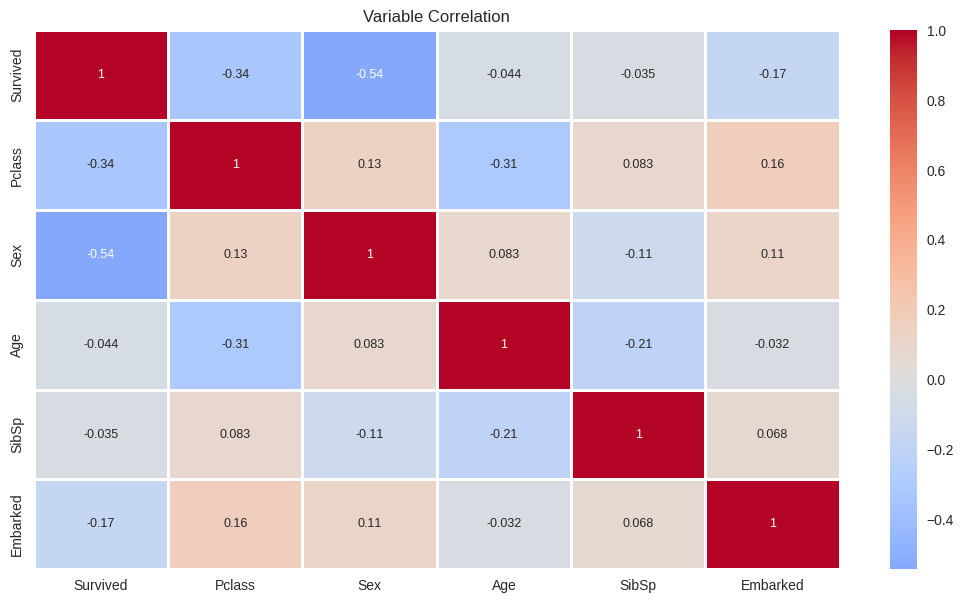

In [13]:
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(13,7))

sns.heatmap(data.corr(),center=0, linewidths=0.9,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

# Perform Linear Regression

In [14]:
#Computing Linear Regression model for Titanic dataset
def linear_reg(X_train,y_train,X_test,y_test):
    linear_reg = LinearRegression()
    linear_reg_model = linear_reg.fit(X_train,y_train)
    print('Train set')
    pred=linear_reg_model.predict(X_train)
    print('Linear Regression Mean Squared error :{}'.format(mean_squared_error(y_train,pred)))
    print('Linear Regression r2_score :{}'.format(r2_score(y_train,pred)))
    print('Test set')
    pred=linear_reg_model.predict(X_test)
    model_lr=linear_reg_model.predict(X_test)
    print('Linear Regression Mean Squared error :{}'.format(mean_squared_error(y_test,pred)))
    print('Linear Regression r2_score :{}'.format(r2_score(y_test,pred)))

In [15]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
cols1= ['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked']

In [17]:
#Computing R2 for testing and training data
linear_reg(X_train[cols1],y_train,X_test[cols1],y_test)

Train set
Linear Regression Mean Squared error :0.14618484868491674
Linear Regression r2_score :0.3772057623056473
Test set
Linear Regression Mean Squared error :0.13955495753570013
Linear Regression r2_score :0.42451989776044163


# SHAP Analysis on Linear Regression model


In [18]:
%%capture
!pip install shap
import shap

In [19]:
import shap
shap.initjs()

In [20]:
# Giving input as 1% of whole dataset as SHAP cant handle large dataset
X = X_train.sample(frac=0.01,random_state=200)
#LinearExplainer is used as linear regression model is used
explainer = shap.LinearExplainer(model, X, feature_perturbation="interventional")
shap_values = explainer.shap_values(X) #Saving SHAP values

In [21]:
#Initialize java script
shap.initjs()

 #Explain one row in the data with the
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [22]:
#Initializing explainer from shap, lm is our trained model
explainer_shap=shap.LinearExplainer(model=model, masker=X_train)

#Computing shap values for train dataset
shap_values = explainer_shap.shap_values(X_train)

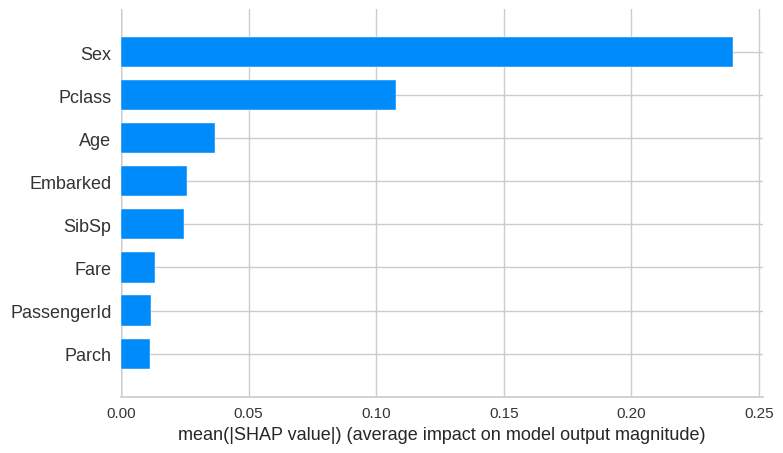

In [23]:
shap.summary_plot(shap_values, X, plot_type="bar")

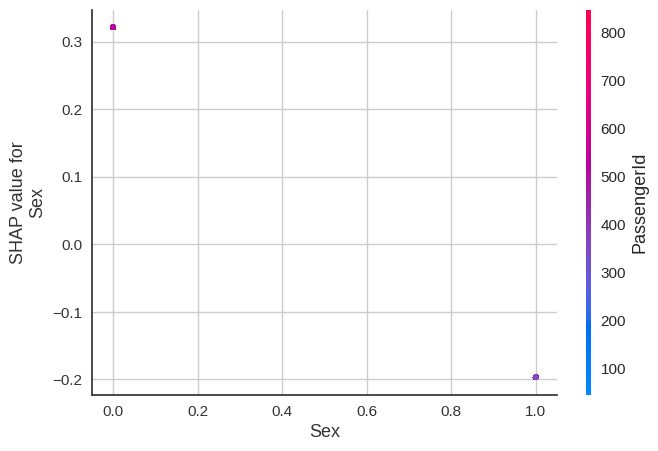

In [24]:
shap.dependence_plot("Sex", shap_values, X_train)

In [25]:
from sklearn.linear_model import LinearRegression
import shap

# train Linear model
#Seperating the dependent and independent variable from the main dataset
X=data.drop(['Survived'],axis=1)
y=data['Survived']
regressor = LinearRegression()
linear_reg = regressor.fit(X, y)

# compute SHAP values
explainer = shap.Explainer(linear_reg, X)
shap_values = explainer(X)

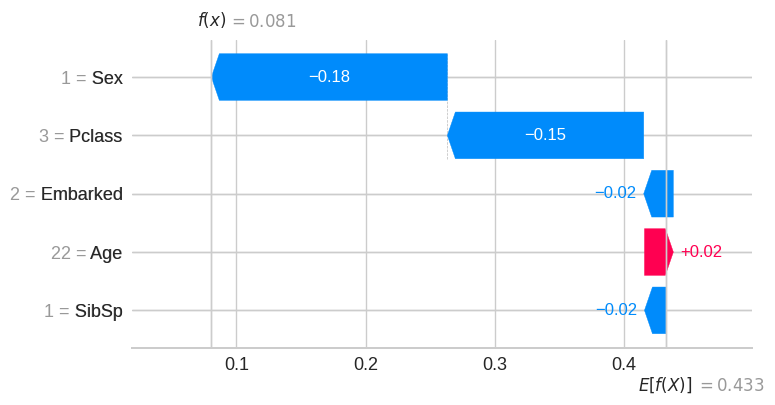

In [26]:
shap.plots.waterfall(shap_values[0])

For the linear regression model from the plots it can be interpreted that Sex, Outlet_Type, Pclass are the important features for this regressor model. These are the major features in determining the Survived people from the Titanic.

# Performing Random Forest


In [27]:
def ramdomforest(X_train,y_train,X_test,y_test):
    rf = RandomForestRegressor()
    rf_model = rf.fit(X_train,y_train)
    print('Train set')
    pred=rf_model.predict(X_train)
    print('ramdomforest Mean Squared error :{}'.format(mean_squared_error(y_train,pred)))
    print('ramdomforest r2_score :{}'.format(r2_score(y_train,pred)))
    print('Tesst set')
    pred=rf_model.predict(X_test)
    print('ramdomforest Mean Squared error :{}'.format(mean_squared_error(y_test,pred)))
    print('ramdomforest r2_score :{}'.format(r2_score(y_test,pred)))

random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
ramdomforest(X_train[cols1],y_train,X_test[cols1],y_test)

Train set
ramdomforest Mean Squared error :0.04924188246043898
ramdomforest r2_score :0.7902138222567503
Tesst set
ramdomforest Mean Squared error :0.1821302644834198
ramdomforest r2_score :0.2489529209378052


# SHAP Analysis on Random Forest Model

In [29]:
%%capture
!pip install shap
import shap

In [30]:
# Giving input as 1% of whole dataset as SHAP cant handle large dataset
X = X_train.head(10)
 # Using Tree explainer as this is tree based classifier model
explainer = shap.TreeExplainer(random_forest)
#Saving shap values
shap_values = explainer.shap_values(X)

In [31]:
shap.initjs() #Initialize java script
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:]) #Explain one row in the data with the model

In [32]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X)

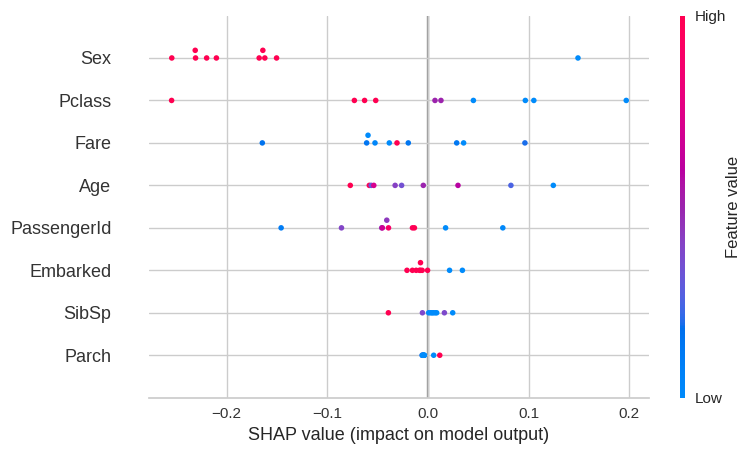

In [33]:
shap.initjs()
shap.summary_plot(shap_values, X)

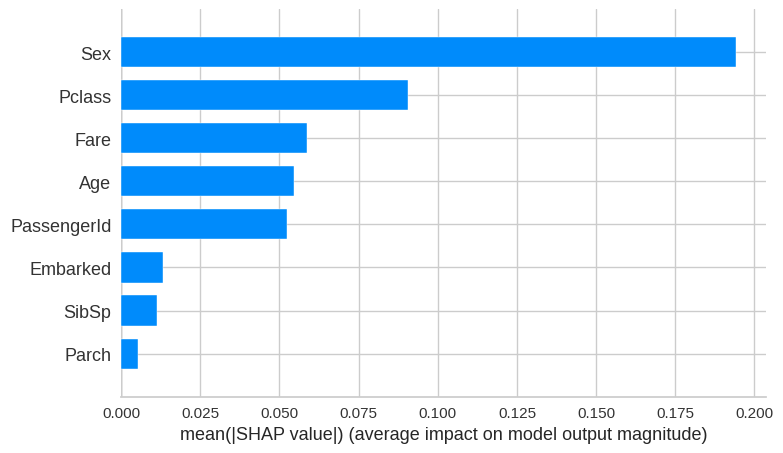

In [34]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris
iris = load_iris()

model_rf1 = RandomForestRegressor(n_estimators=10)
# Train
model_rf1.fit(iris.data, iris.target)
# Extract single tree
estimator = model_rf1.estimators_[5]

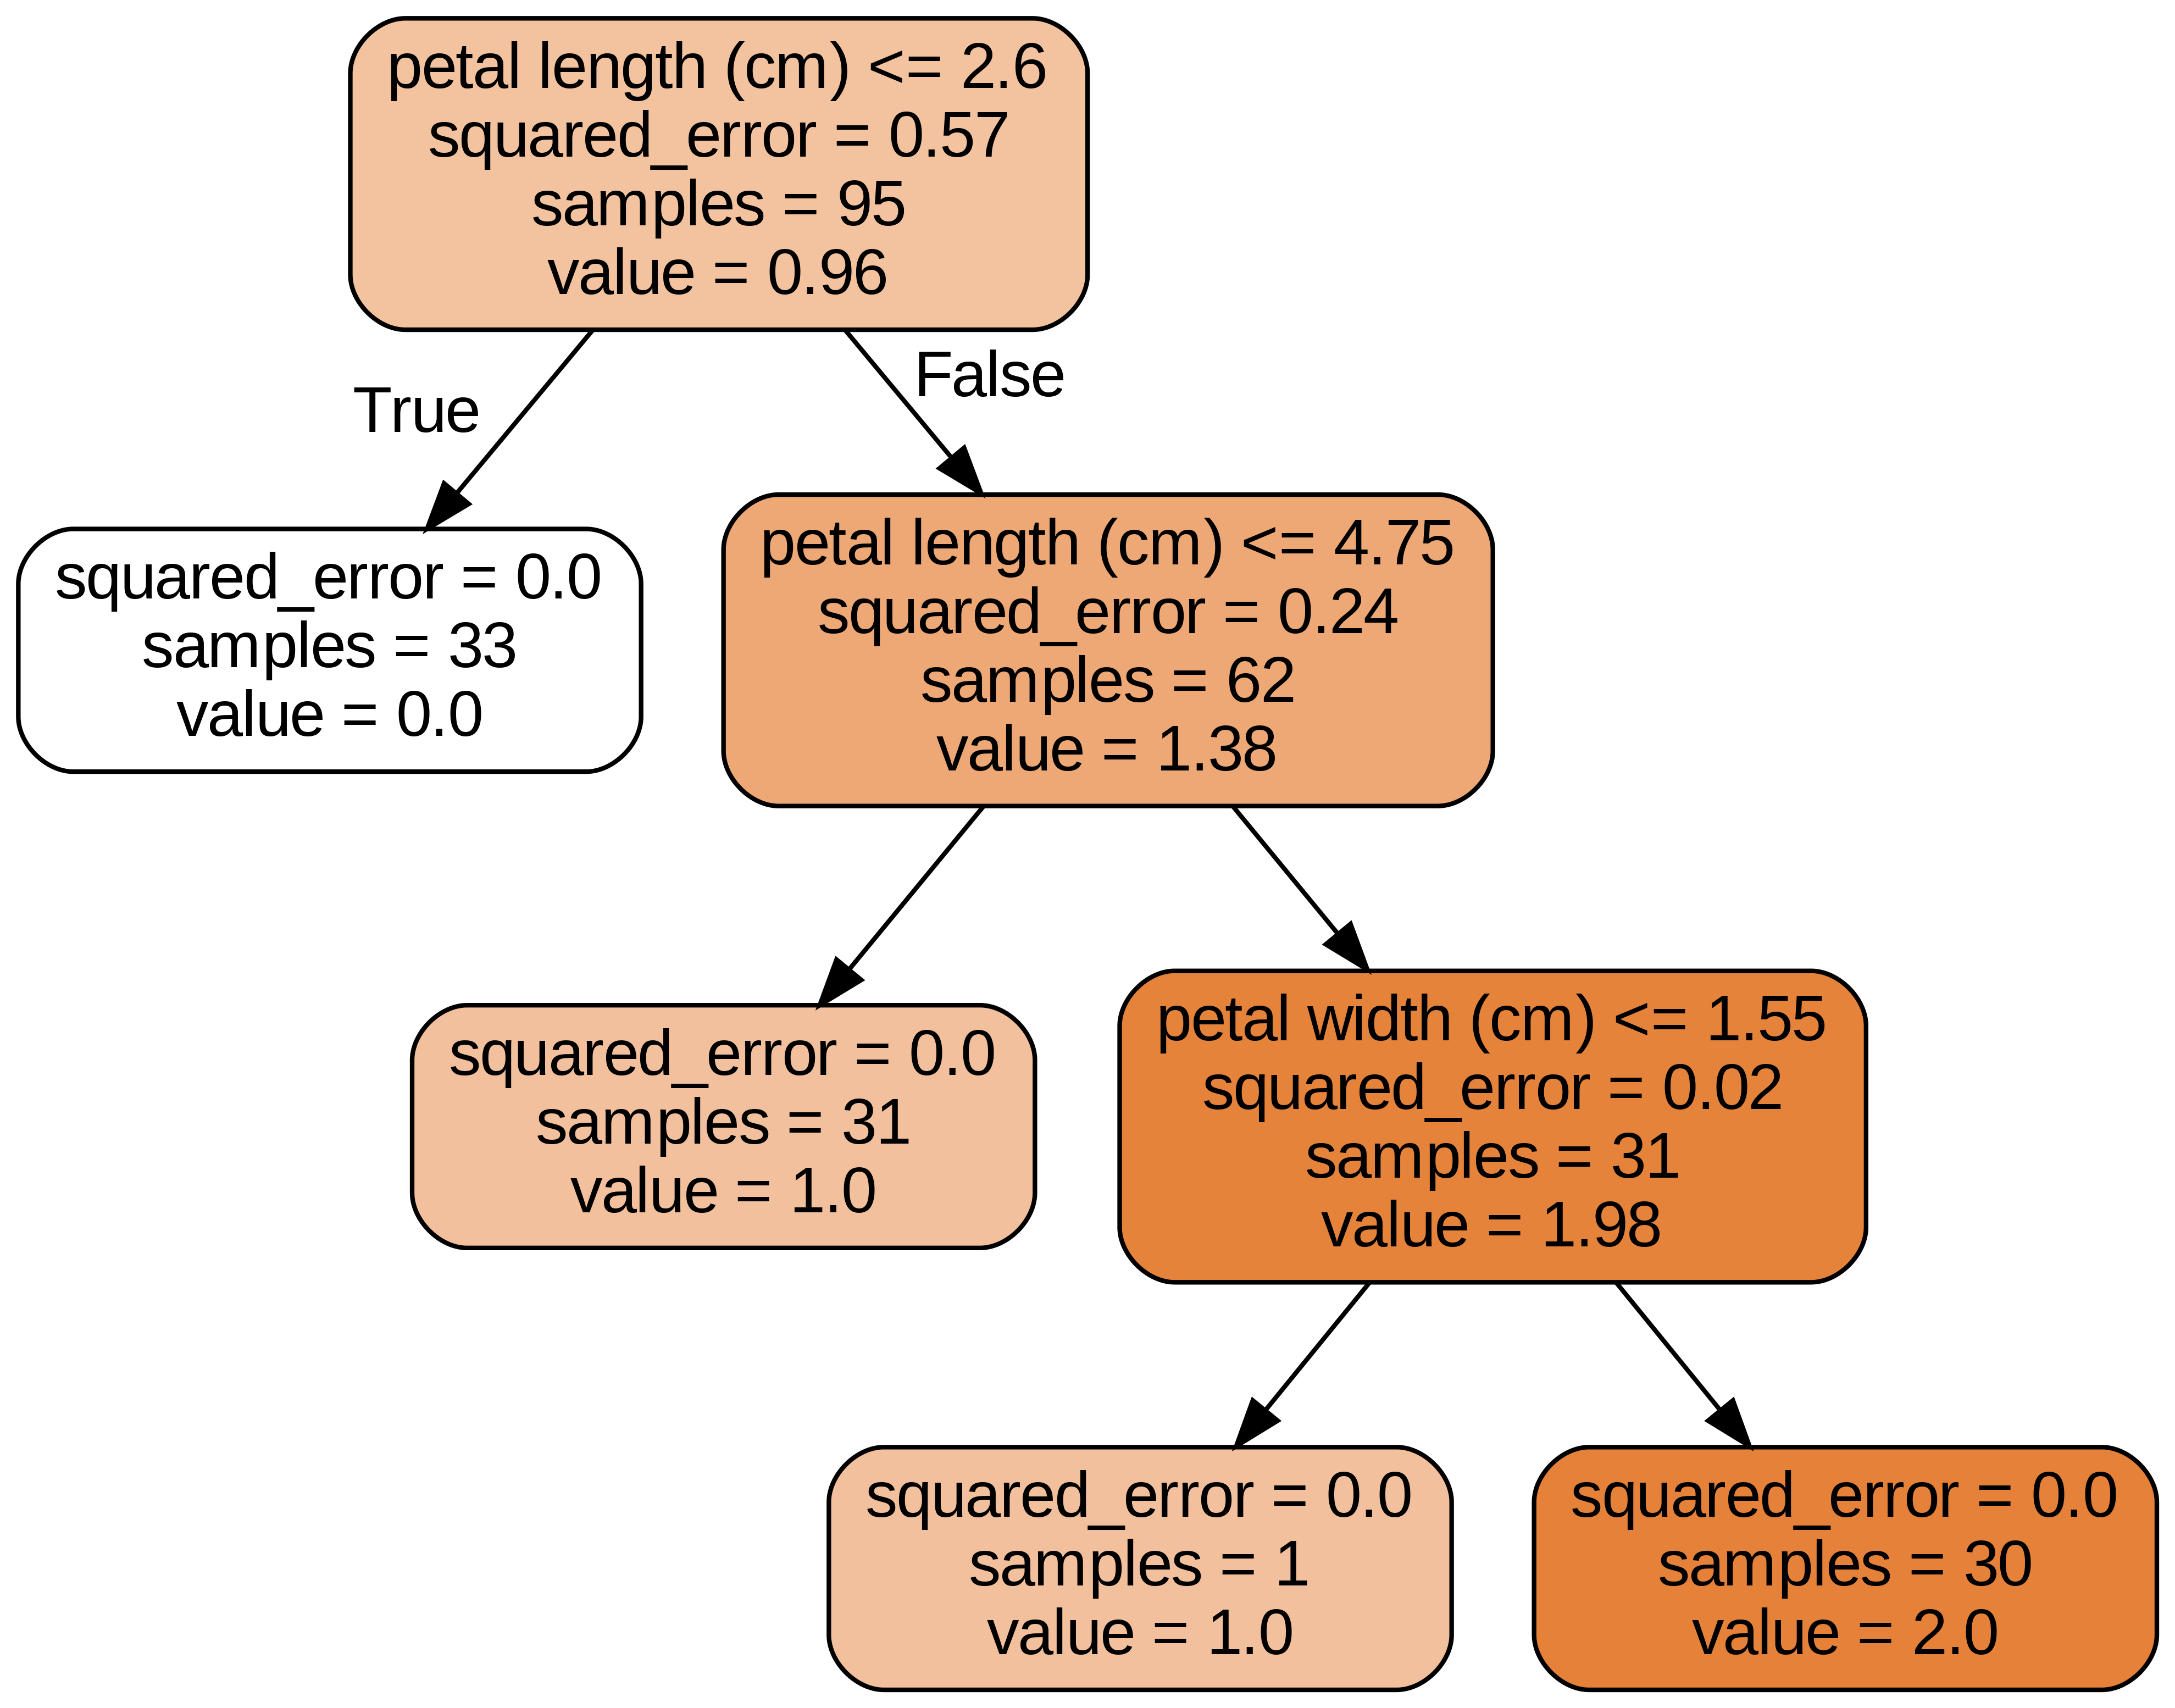

In [36]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot',
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False,
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in colab notebook
from IPython.display import Image
Image(filename = 'tree.png')

For the random forest model according to SHAP Analysis the important features to determine the target variable 'Survived' are Sex, Pclass and Fare. Sex and Pclasss are the common feature which is important for both Random Forest and Linear Regression Model. Sex has the highest value of feature importance and is placed first on the scale.

# Using AutoML to identify best model


In [37]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6
run_time=222

In [38]:
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [39]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:40726..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpu6ptabe5
  JVM stdout: /tmp/tmpu6ptabe5/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpu6ptabe5/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:40726
Connecting to H2O server at http://127.0.0.1:40726 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    4 days
H2O_cluster_name:           H2O_from_python_unknownUser_m7xpxr
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:40726
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [40]:
# Create a 80/20 train/test split
url = 'https://raw.githubusercontent.com/kunaltibe7/datascienceengmethods/main/Titanic/titanic.csv'
df = h2o.import_file(path = url)
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [41]:
# Set the features and target
X=df.columns
print(X)

y ='Survived'
X.remove(y)
print(X)

['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [42]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)
# Passing the training and testing dataset through H20 AutomML
aml.train(x=X,y=y,training_frame=df_train)

AutoML progress: |
03:15:51.287: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███
03:16:00.150: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


03:16:01.507: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
03:16:05.785: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
03:16:06.98: _response param, We have de

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_lr_annealing_selection_AutoML_1_20240318_31550_select_model


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    39                 39                          8895                   4            4            4             7             16            13.5641

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.08830524503648966
RMSE: 0.29716198450759085
MAE: 0.21802843920503256
RMSLE: 0.20892495414414802
Mean Residual Deviance: 0.08830524503648966

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.1245772672687943
RMSE: 0.3529550499267496
MAE: 0.2617633453983843
RMSLE: 0.2482084800690673
Mean Residual Deviance: 0.1245772672687943

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     nan       0          nan           nan           nan           nan           nan
loglikelihood           nan       0          nan           nan           nan           nan           nan
mae                     0.260511  0.0216564  0.271265      0.283198      0.233211      0.272957      0.241924
mean_residual_deviance  0.124782  0.0214502  0.141896      0.150357      0.102274      0.124265      0.10512
mse                     0.124782  0.0214502  0.141896      0.150357      0.102274      0.124265      0.10512
r2                      0.475201  0.0755612  0.425518      0.389291      0.561179      0.453287      0.546731
residual_deviance       0.124782  0.0214502  0.141896      0.150357      0.102274      0.124265      0.10512
rmse                    0.352197  0.0304002  0.37669       0.387759      0.319802      0.352512      0.324222
rmsle                   0.24782   0.0188912  0.260621      0.270046      0.22729       0.251595      0.229546

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-03-18 03:19:30  0.620 sec   0                  0.488567         0.477396        0.238698
    2024-03-18 03:19:30  0.633 sec   5                  0.396678         0.377765        0.157353
    2024-03-18 03:19:30  0.643 sec   10                 0.354227         0.319203        0.125477
    2024-03-18 03:19:30  0.654 sec   15                 0.332047         0.283925        0.110255
    2024-03-18 03:19:30  0.664 sec   20                 0.318918         0.258751        0.101708
    2024-03-18 03:19:30  0.675 sec   25                 0.310564         0.240581        0.0964502
    2024-03-18 03:19:30  0.684 sec   30                 0.304386         0.229811        0.0926511
    2024-03-18 03:19:30  0.693 sec   35                 0.300273         0.222724        0.0901641
    2024-03-18 03:19:30  0.701 sec   39                 0.297162         0.218028        0.0883052

Variable Importances: 
variable     relative_importance    scaled_importance    percentage
-----------  ---------------------  -------------------  ------------
Sex          246.408                1                    0.41429
Fare         94.9219                0.385223             0.159594
Pclass       86.1714                0.349711             0.144882
Age          62.696                 0.25444              0.105412
PassengerId  47.6238                0.193272             0.0800709
SibSp        26.8596                0.109005             0.0451597
Embarked     21.0251   

In [43]:
print(aml.leaderboard)

model_id                                                             rmse       mse       mae     rmsle    mean_residual_deviance
GBM_lr_annealing_selection_AutoML_1_20240318_31550_select_model  0.352955  0.124577  0.261763  0.248208                  0.124577
StackedEnsemble_BestOfFamily_4_AutoML_1_20240318_31550           0.35321   0.124758  0.250882  0.248122                  0.124758
GBM_grid_1_AutoML_1_20240318_31550_model_12                      0.354476  0.125653  0.246224  0.248703                  0.125653
StackedEnsemble_BestOfFamily_3_AutoML_1_20240318_31550           0.355242  0.126197  0.255218  0.249972                  0.126197
StackedEnsemble_AllModels_2_AutoML_1_20240318_31550              0.356088  0.126798  0.254181  0.250652                  0.126798
StackedEnsemble_AllModels_3_AutoML_1_20240318_31550              0.356296  0.126947  0.280268  0.25096                   0.126947
StackedEnsemble_AllModels_1_AutoML_1_20240318_31550              0.357174  0.127573  0.256

In [44]:
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict

{'GBM_lr_annealing_selection_AutoML_1_20240318_31550_select_model': 0,
 'GLM_1_AutoML_1_20240318_31550': 56}

In [45]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

0


In [46]:
#Printing the best model
print("The best model is - " , best_model.algo)

The best model is -  gbm


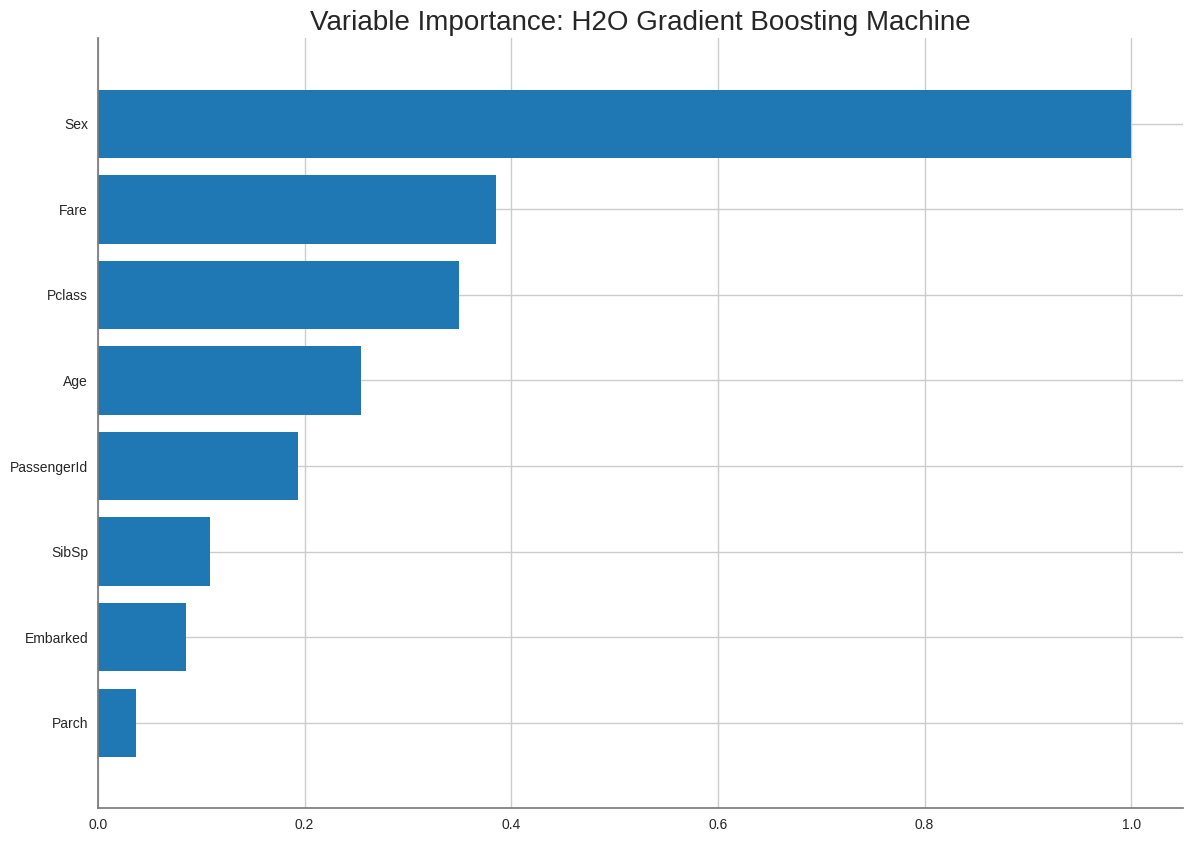

<Figure size 800x550 with 0 Axes>

In [47]:
#plot variables in order of their importance for price prediction
if best_model.algo in ['gbm','drf','xrt','xgboost']:
    best_model.varimp_plot()

# SHAP Analysis on AutoML model

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                             rmse       mse       mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
---------------------------------------------------------------  --------  --------  --------  --------  ------------------------  ------------------  -------------------------  ---------------
GBM_grid_1_AutoML_1_20240318_31550_model_7                       0.385752  0.148805  0.291038  0.274659                  0.148805                  86                   0.013404  GBM
GBM_1_AutoML_1_20240318_31550                                    0.387121  0.149862  0.301392  0.276948                  0.149862                 240                   0.011352  GBM
StackedEnsemble_AllModels_4_AutoML_1_20240318_31550              0.387124  0.149865  0.286101  0.275202                  0.149865                 441                   0.377414  StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_1_20240318_31550              0.387355  0.150044  0.289743  0.276027                  0.150044                 416                   0.531776  StackedEnsemble
GBM_grid_1_AutoML_1_20240318_31550_model_29                      0.38756   0.150203  0.274285  0.274139                  0.150203                  96                   0.015186  GBM
GBM_grid_1_AutoML_1_20240318_31550_model_22                      0.38776   0.150358  0.282582  0.276192                  0.150358                 137                   0.022591  GBM
GBM_grid_1_AutoML_1_20240318_31550_model_27                      0.389026  0.151341  0.292874  0.277479                  0.151341                  73                   0.01262   GBM
GBM_grid_1_AutoML_1_20240318_31550_model_24                      0.389423  0.15165   0.291229  0.277088                  0.15165                  123                   0.015508  GBM
StackedEnsemble_BestOfFamily_4_AutoML_1_20240318_31550           0.390063  0.152149  0.267991  0.276791                  0.152149                 139                   0.202972  StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20240318_31550           0.390282  0.15232   0.269527  0.277294                  0.15232                  265                   0.071423  StackedEnsemble
GBM_grid_1_AutoML_1_20240318_31550_model_9                       0.390409  0.152419  0.282439  0.277268                  0.152419                  66                   0.04714   GBM
GBM_grid_1_AutoML_1_20240318_31550_model_11                      0.390416  0.152425  0.306666  0.27743                   0.152425                  77                   0.03478   GBM
StackedEnsemble_AllModels_1_AutoML_1_20240318_31550              0.390574  0.152548  0.269121  0.277497                  0.152548                 265                   0.06255   StackedEnsemble
GBM_lr_annealing_selection_AutoML_1_20240318_31550_select_model  0.390749  0.152685  0.274524  0.276638                  0.152685                  84                   0.022089  GBM
GBM_grid_1_AutoML_1_20240318_31550_model_20                      0.390844  0.152759  0.289652  0.278182                  0.152759                 103                   0.018916  GBM
GBM_grid_1_AutoML_1_20240318_31550_model_31                      0.391177  0.153019  0.293816  0.2791                    0.153019                 182                   0.019788  GBM
GBM_grid_1_AutoML_1_20240318_31550_model_16                      0.391824  0.153526  0.317235  0.280309                  0.153526                  61                   0.019024  GBM
GBM_grid_1_AutoML_1_20240318_31550_model_19                      0.392959  0.154417  0.319565  0.281237                  0.154417                  54                   0.020943  GBM
GBM_2_AutoML_1_20240318_31550                                    0.393186  0.154595  0.28256   0.280236                  0.154595                 459                   0.012829  GBM
GBM_grid_1_AutoML_1_20240318_31550_model_17                      0.393487  0.154832  0.28387   0.280391  

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

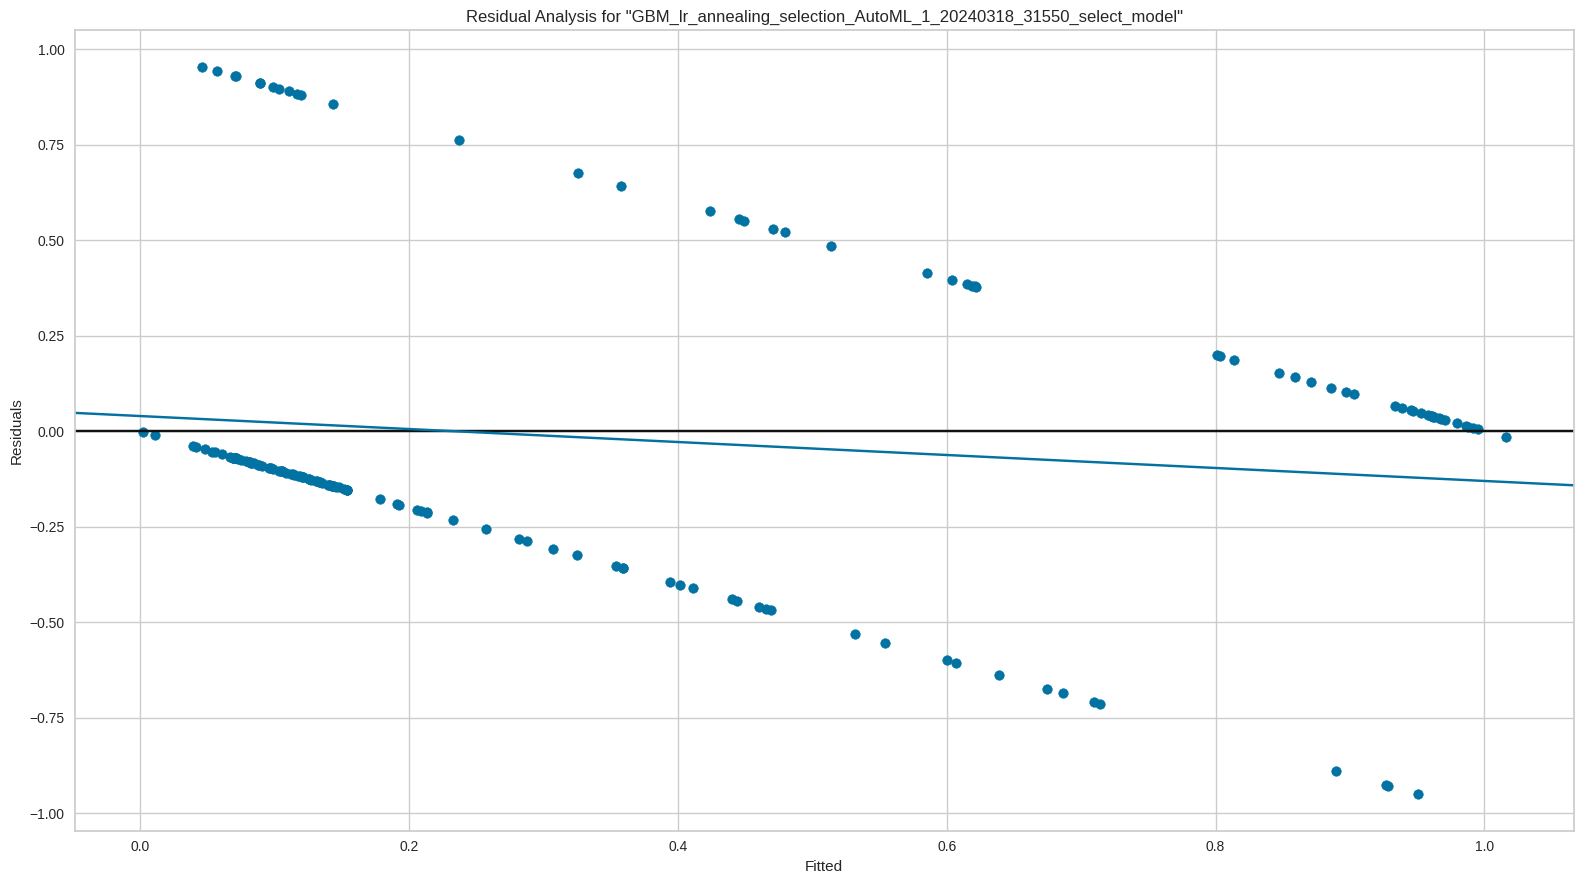

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

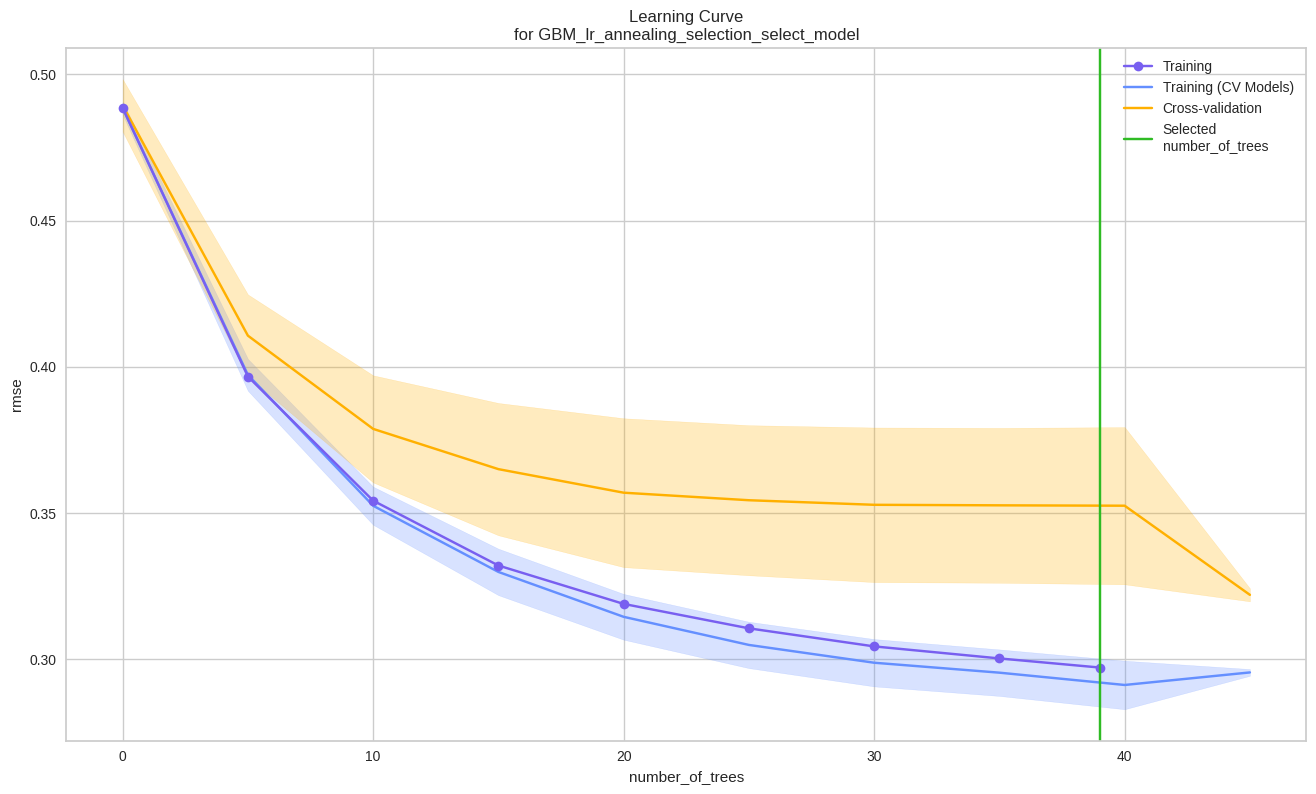

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

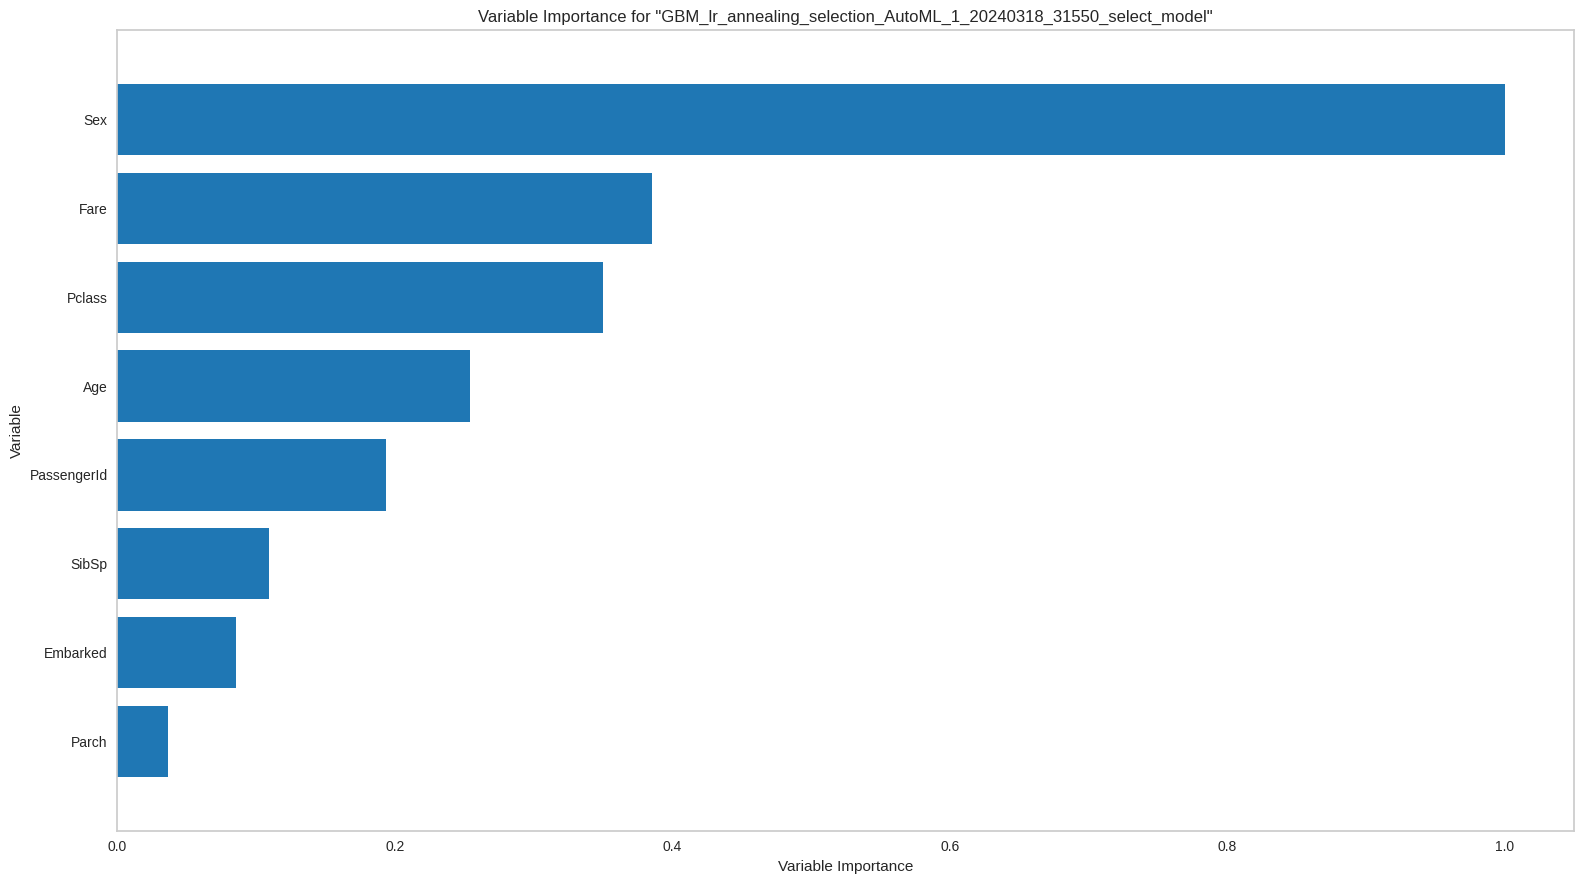

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

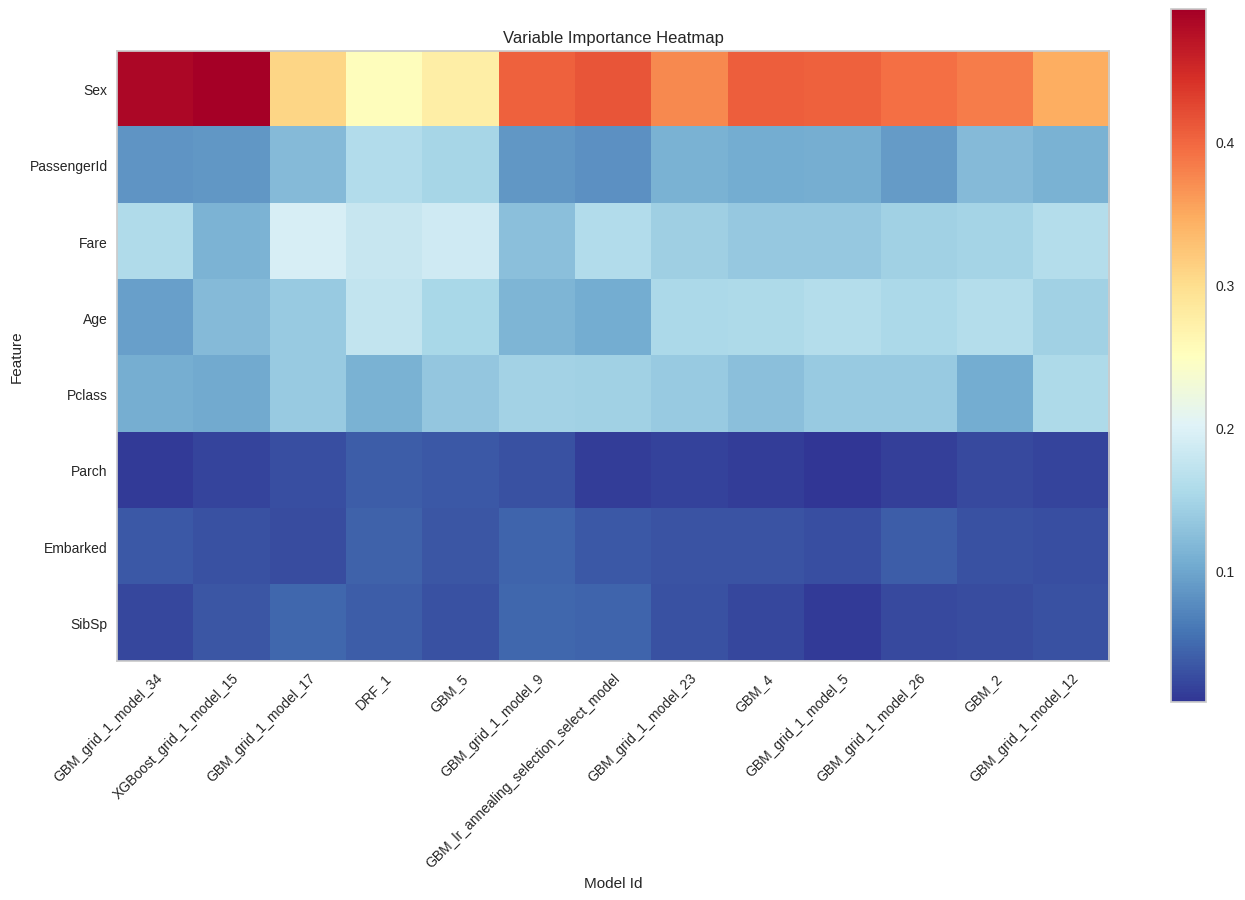

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

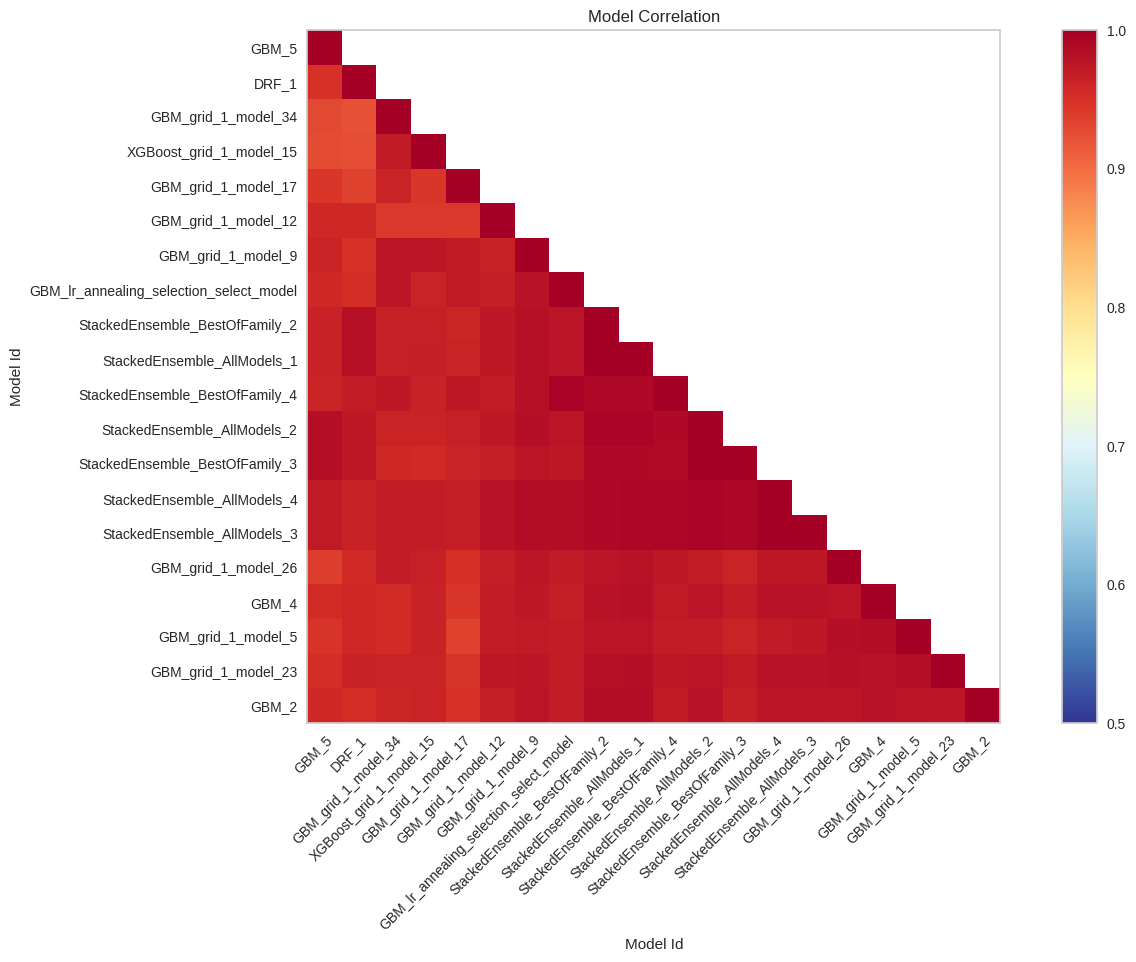

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

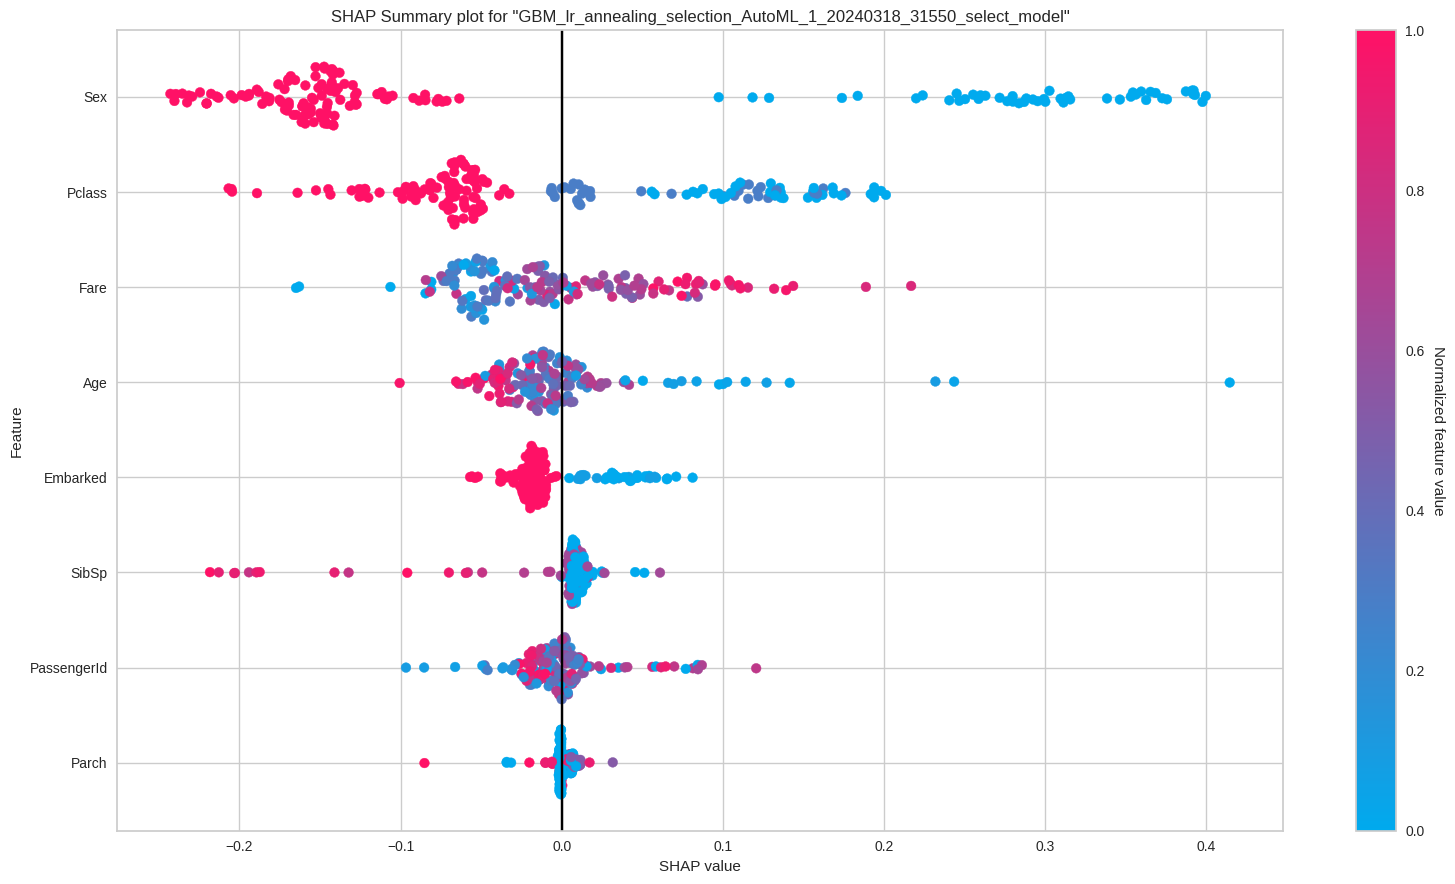

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

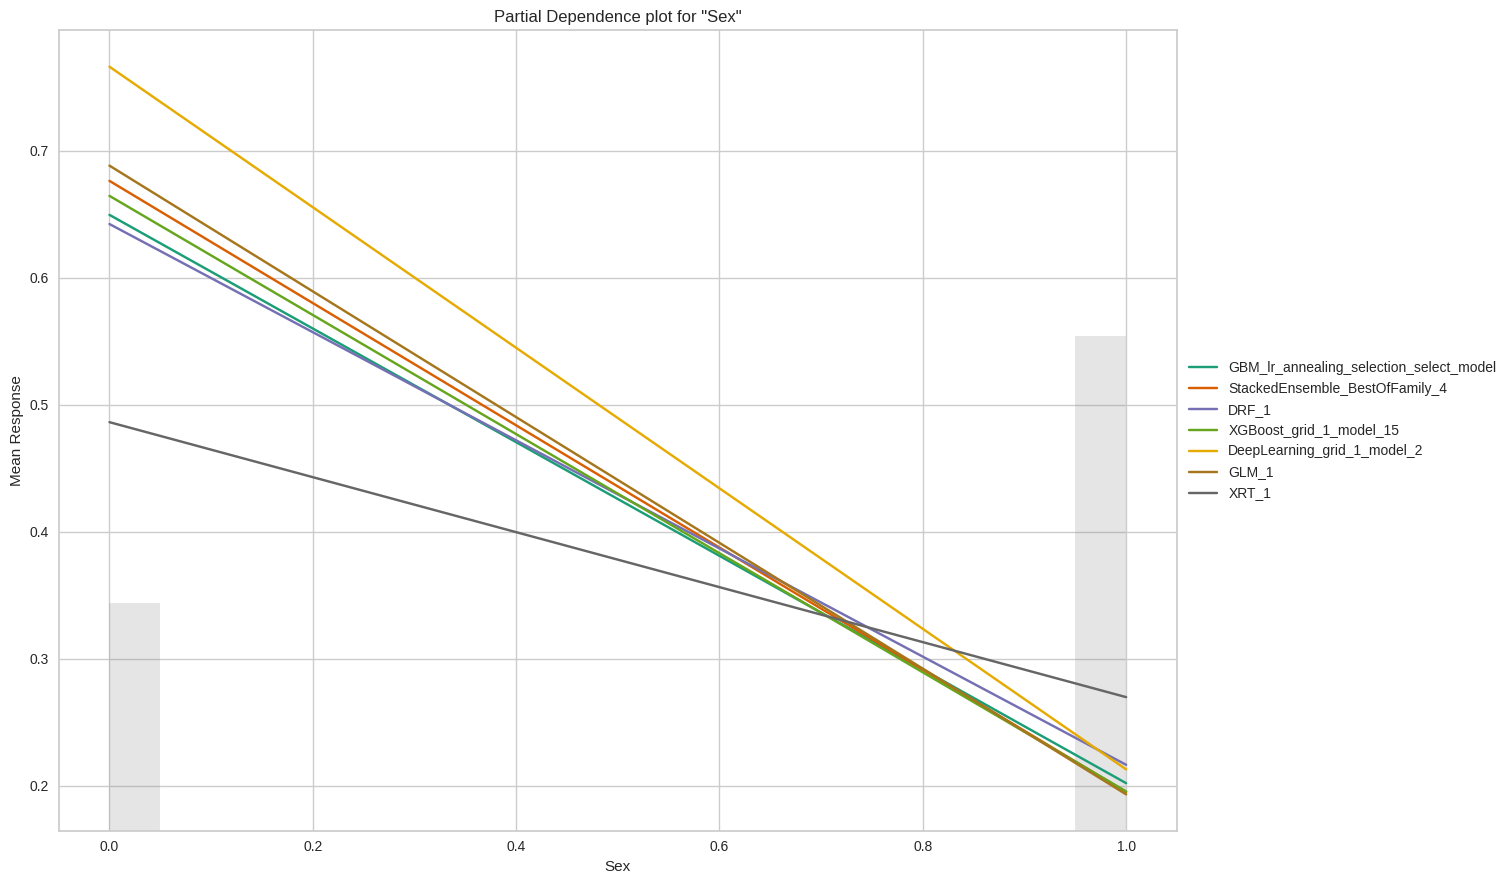

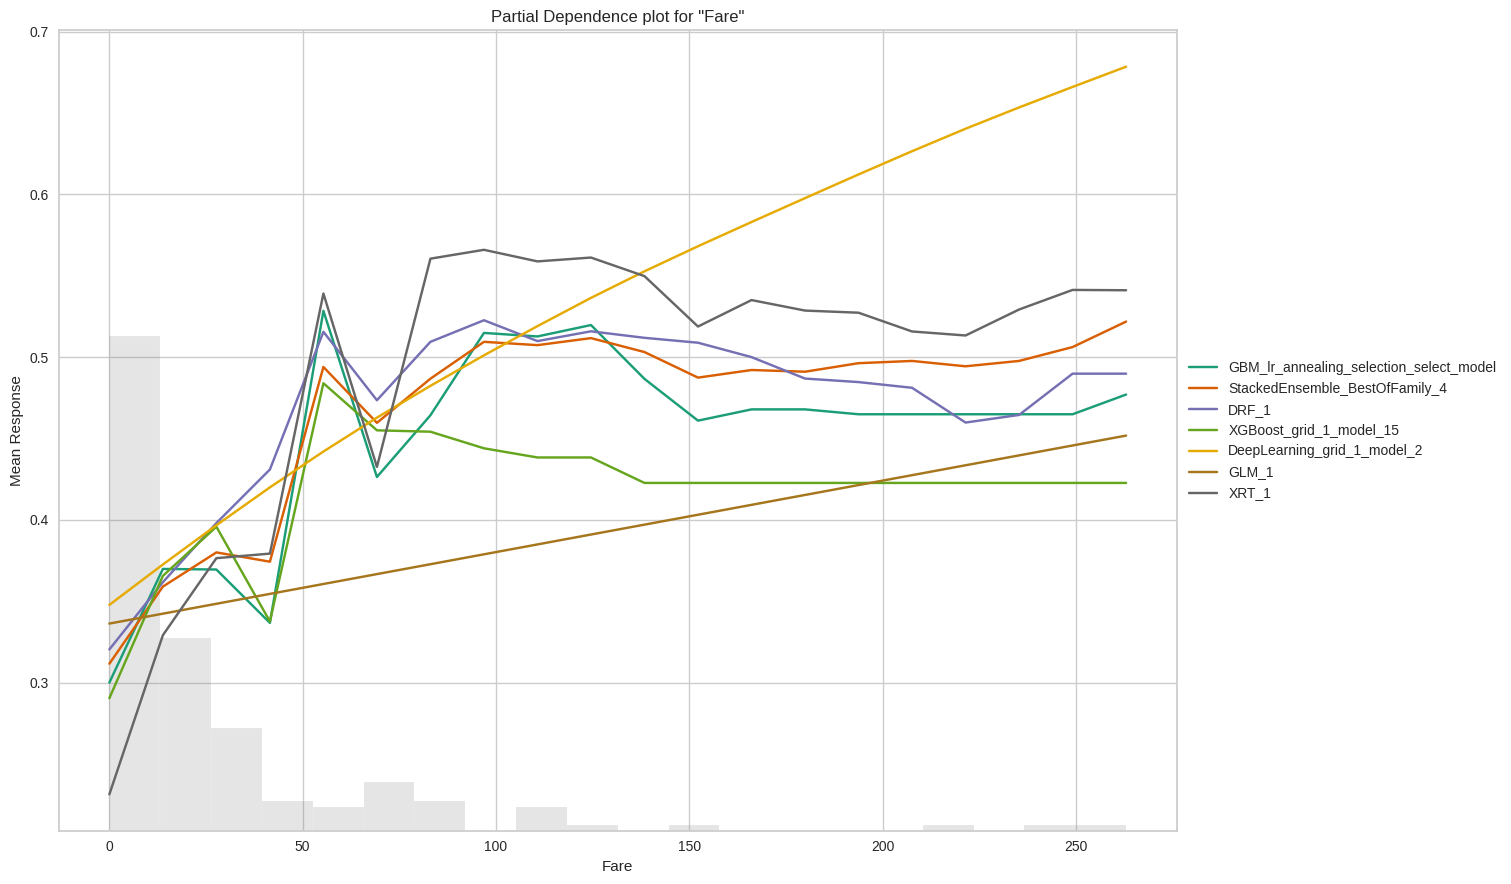

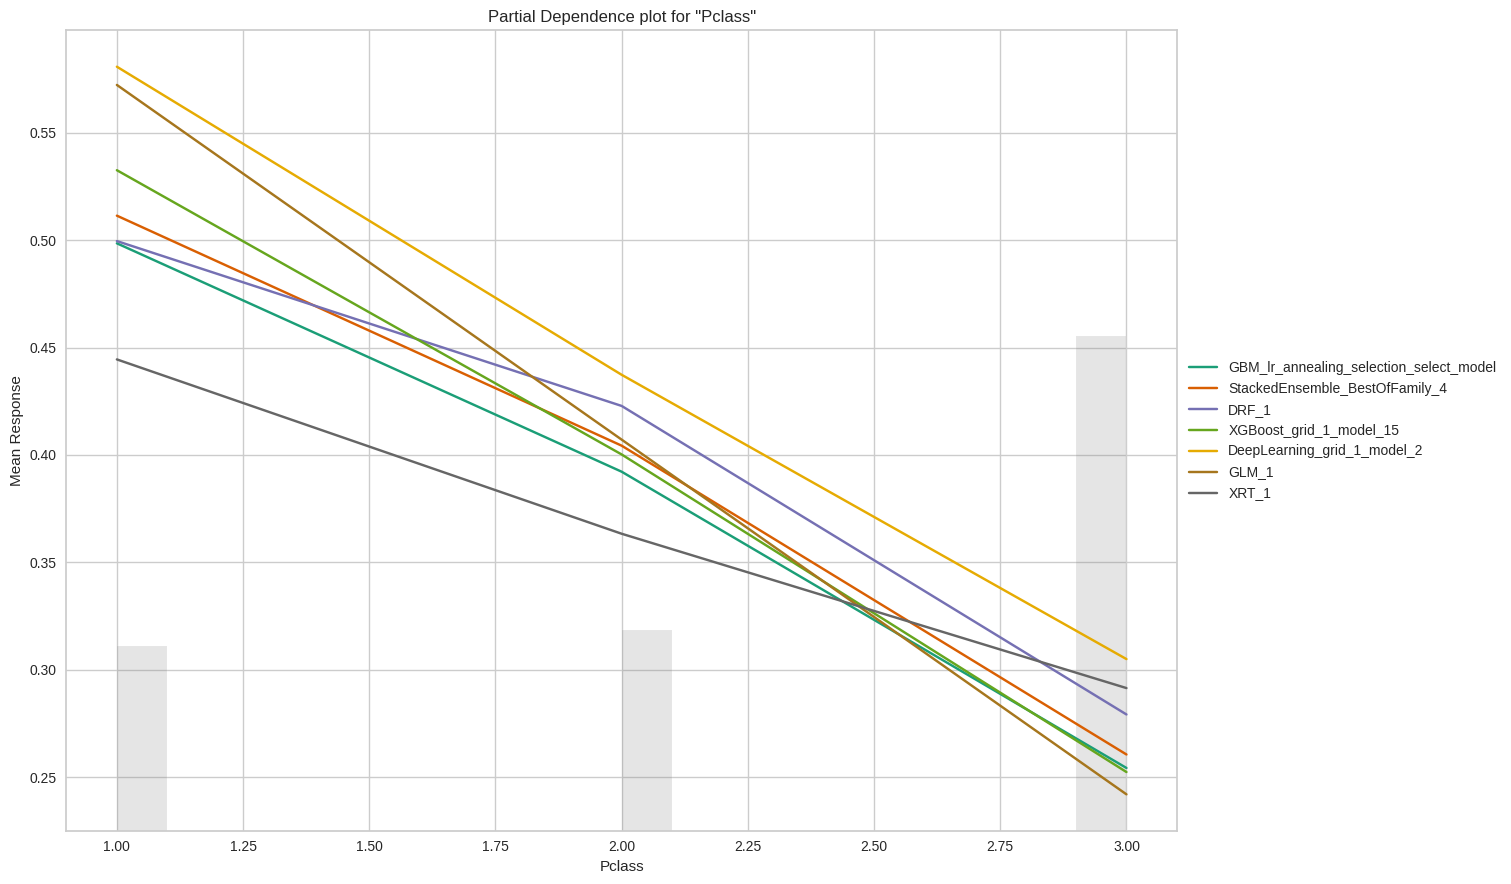

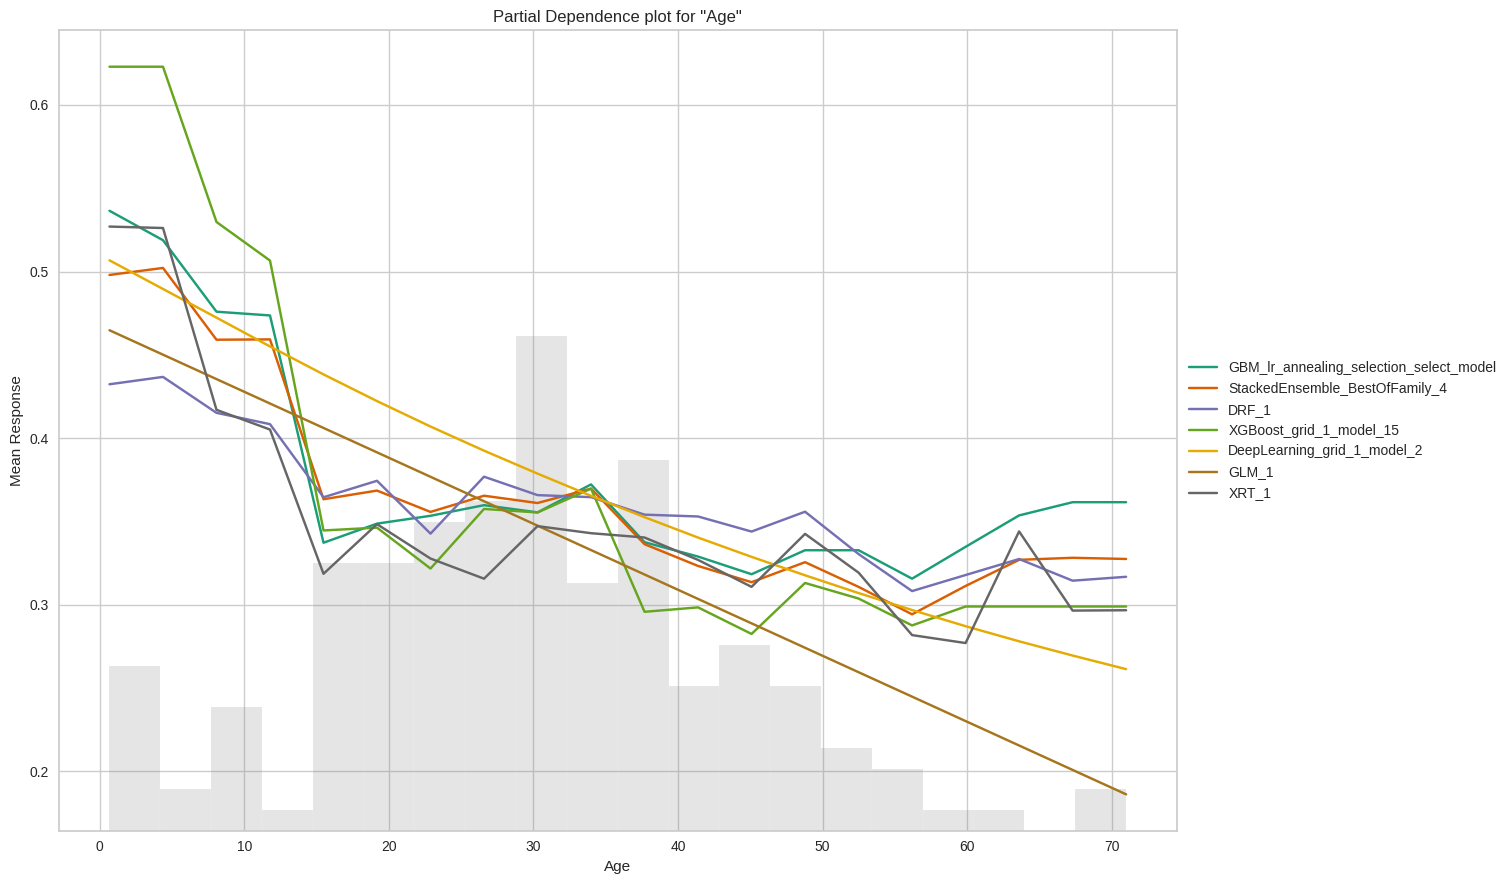

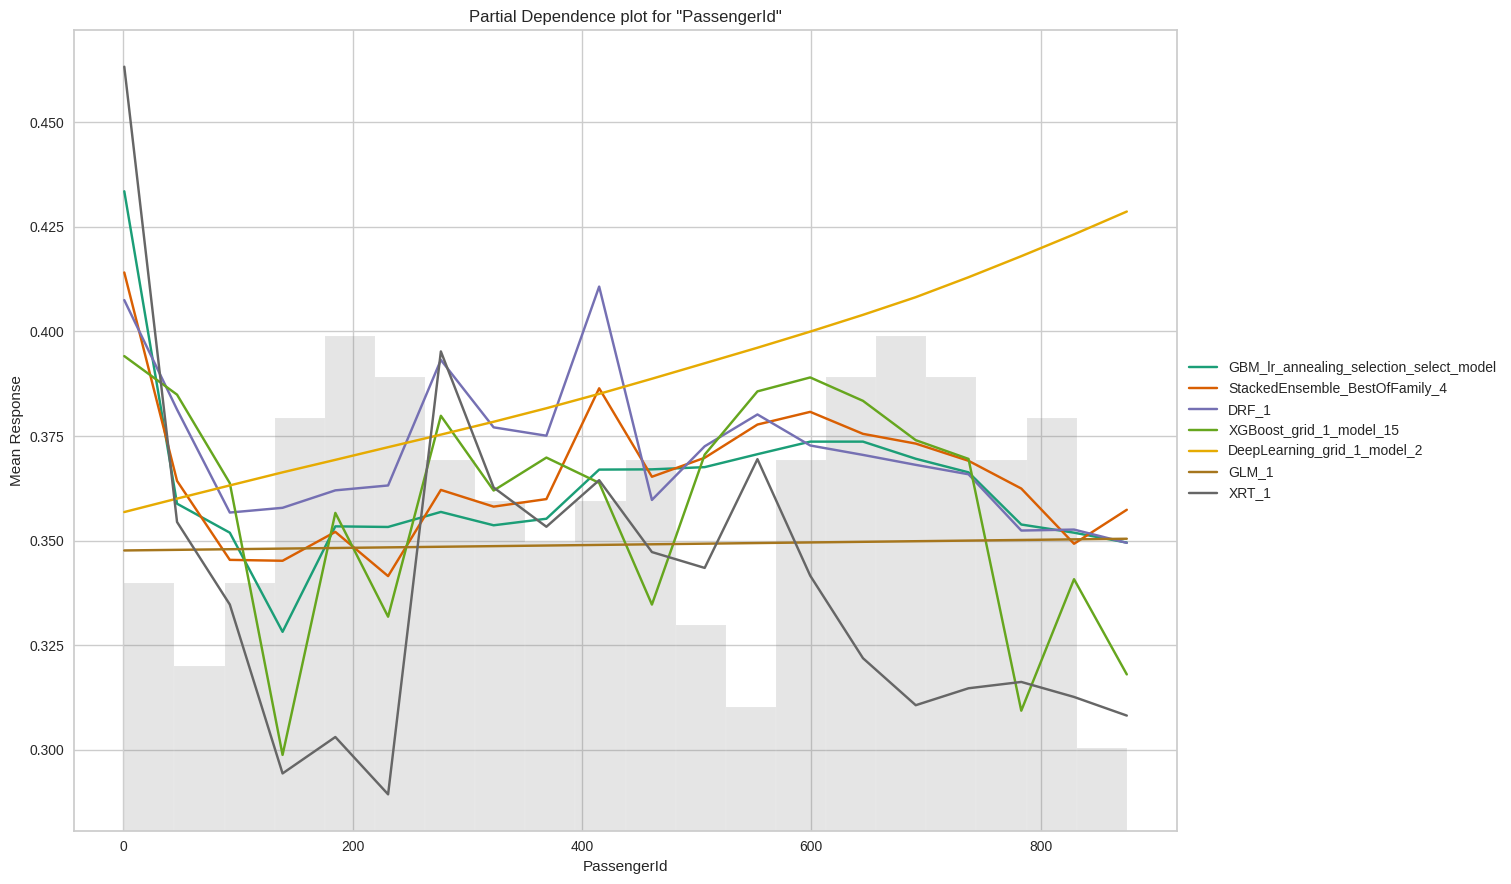

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

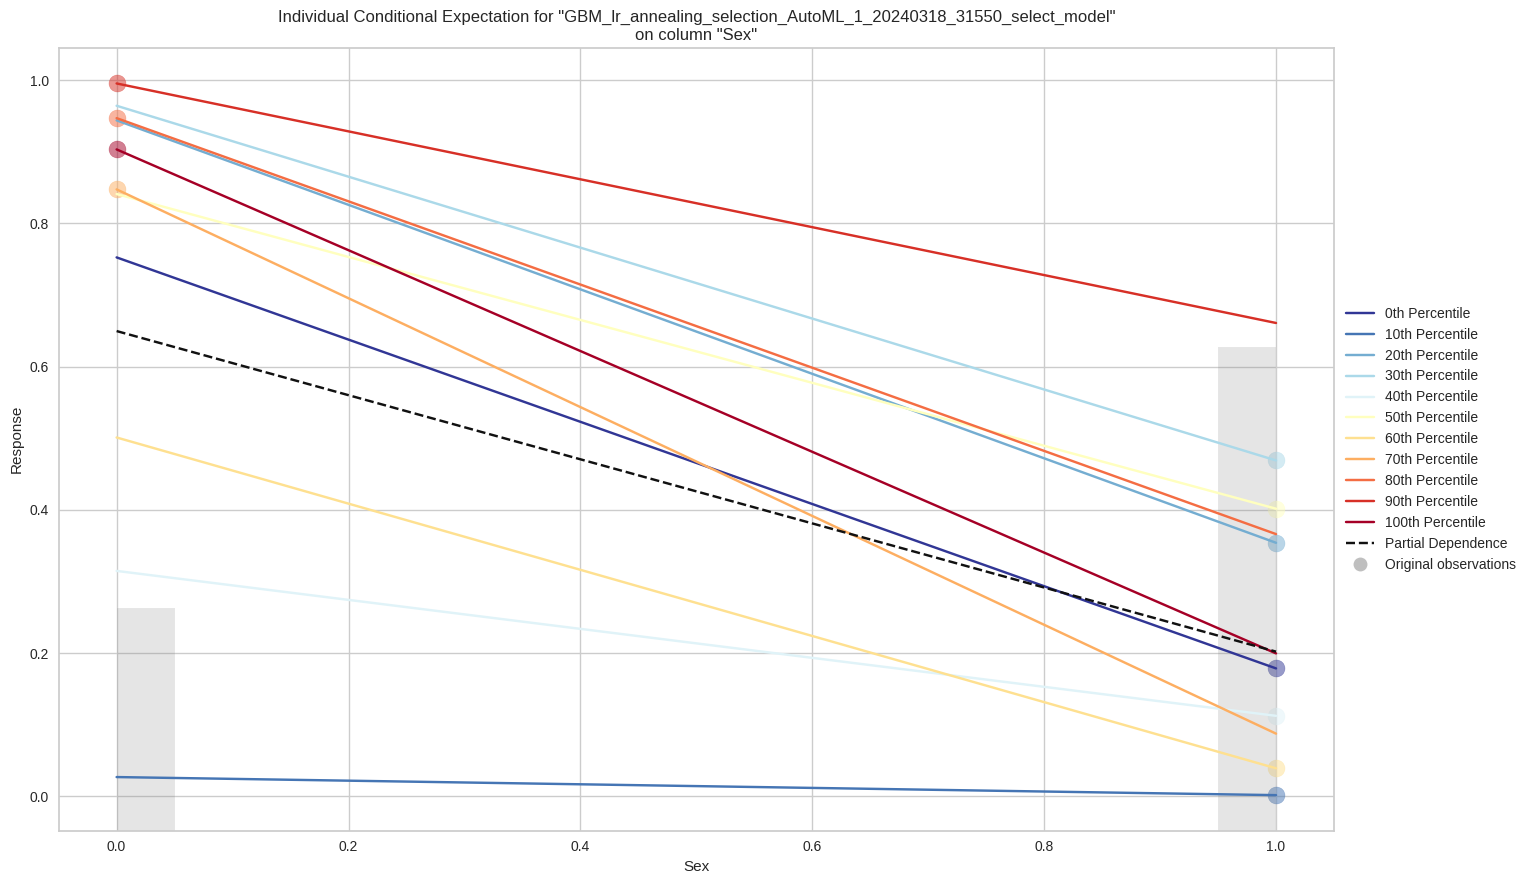

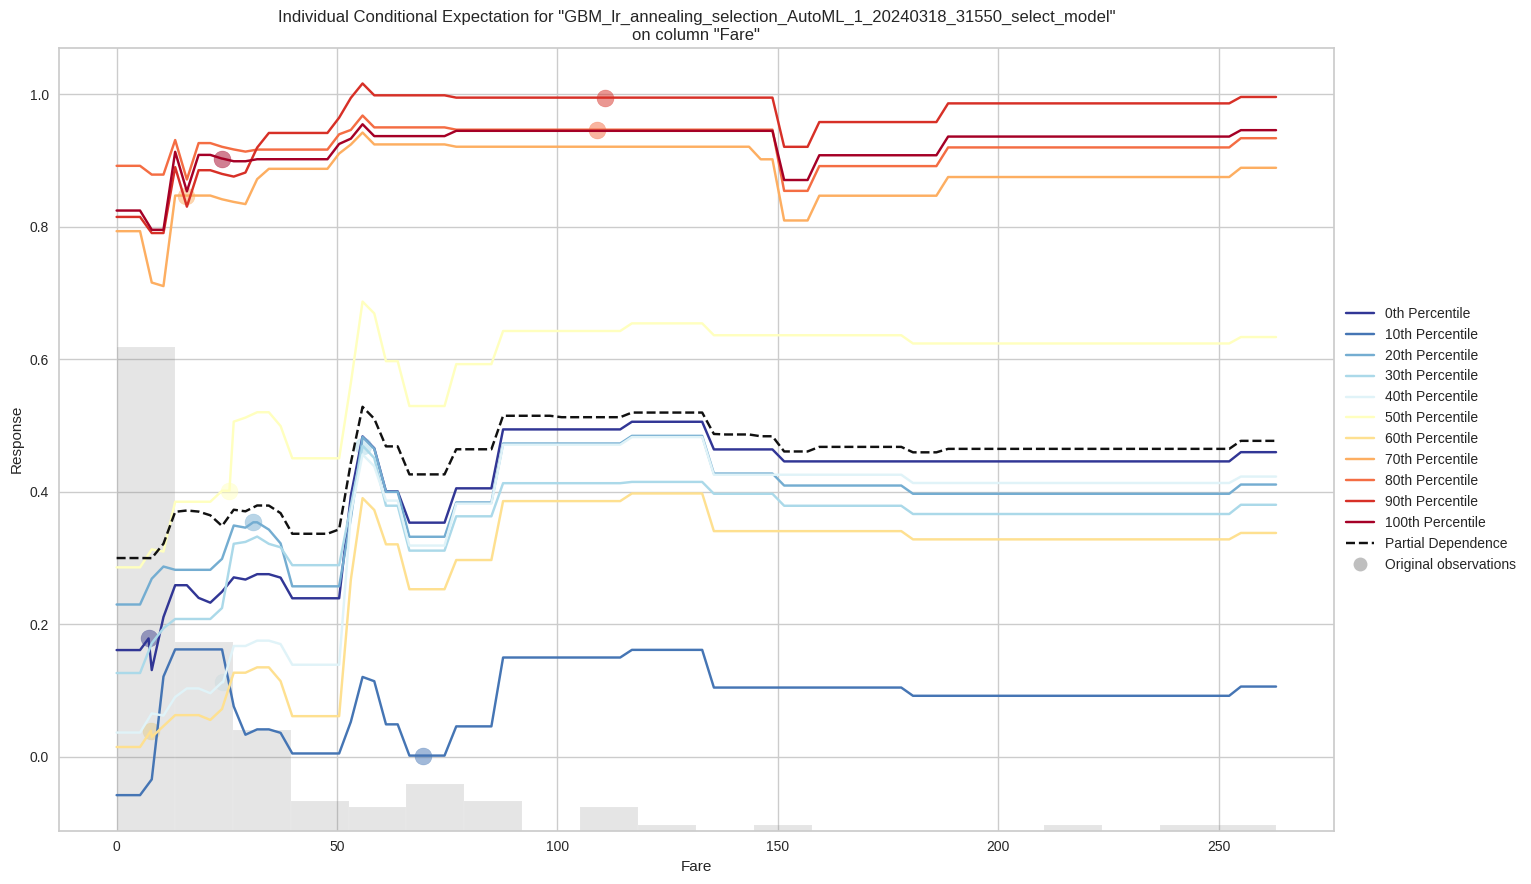

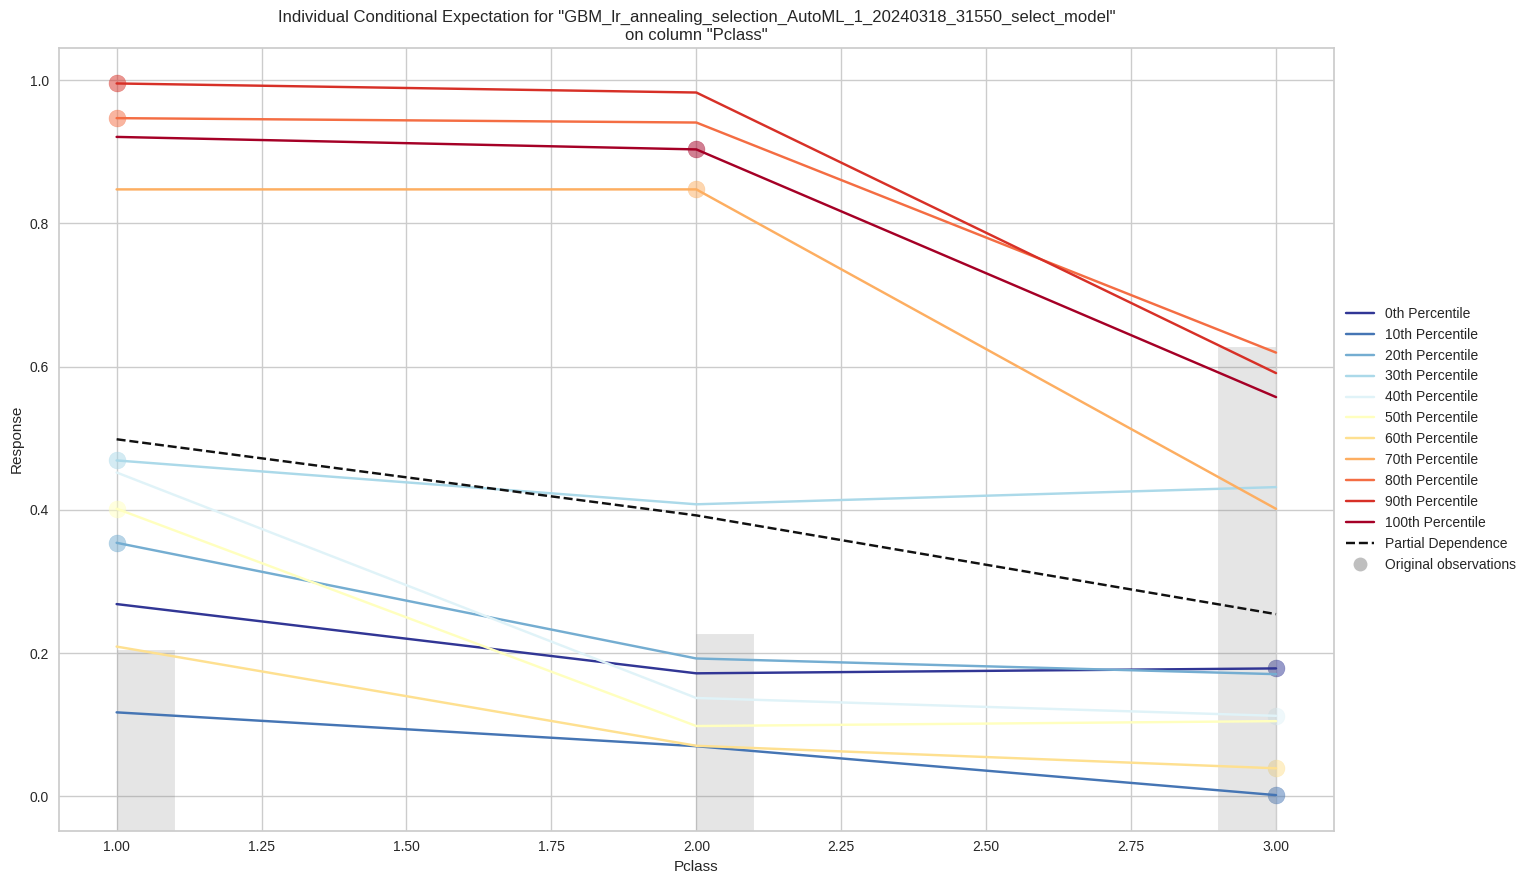

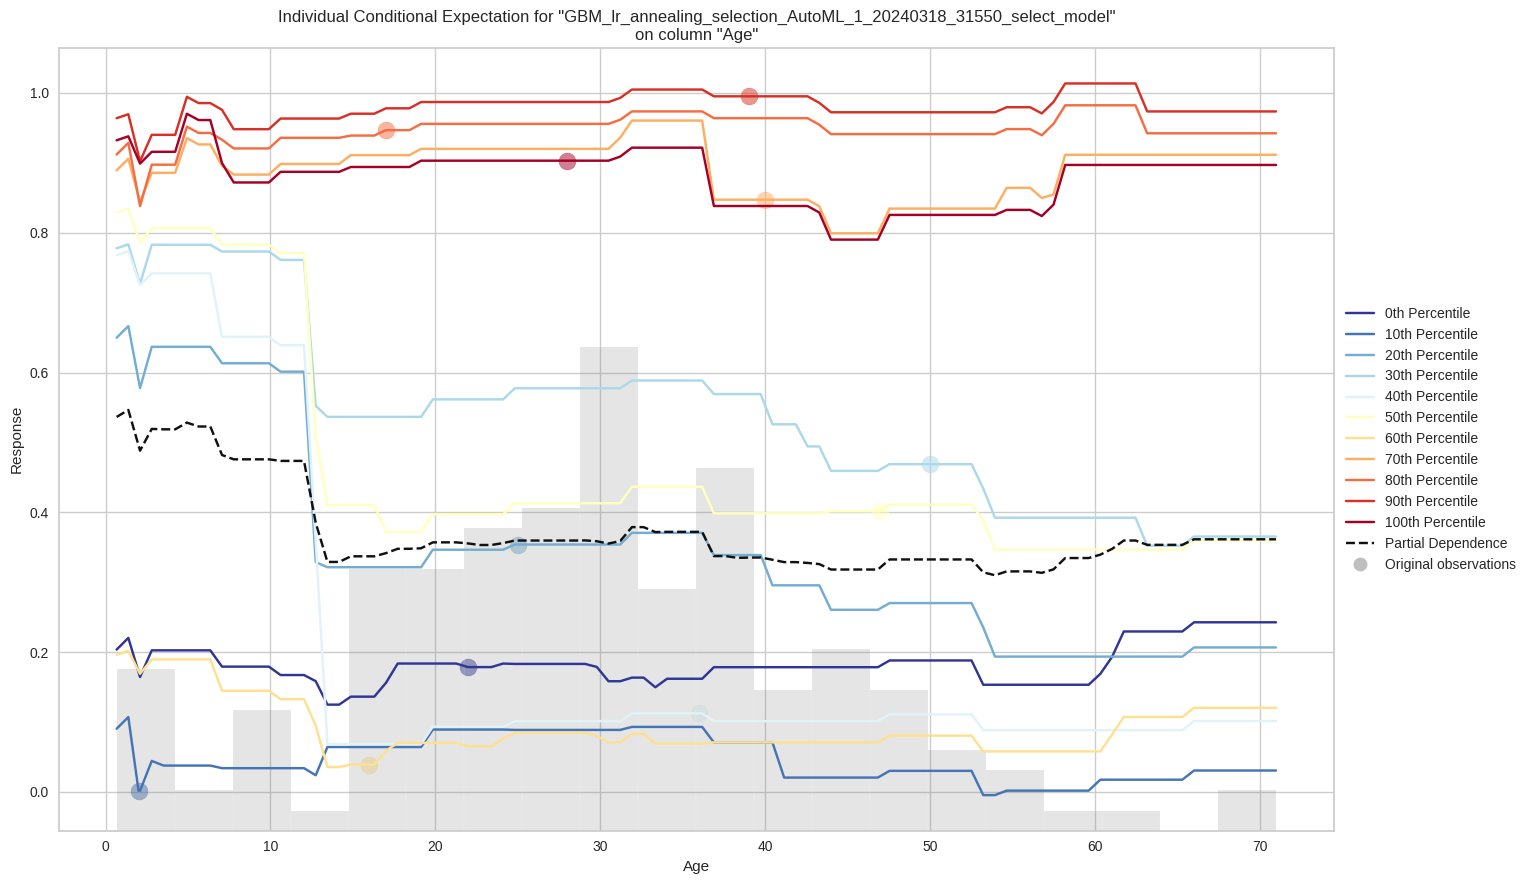

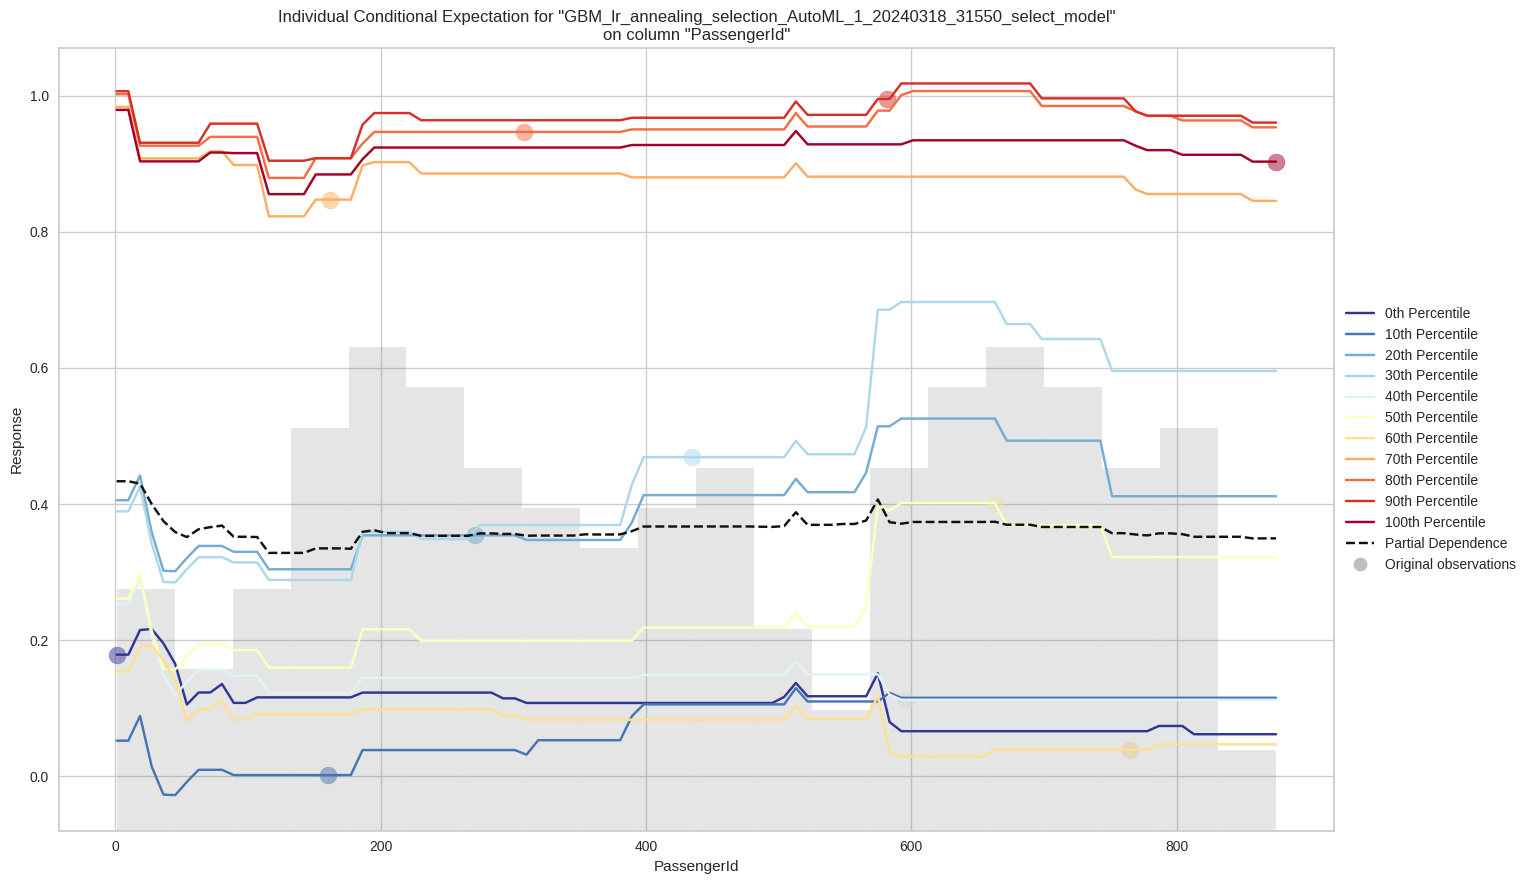

In [48]:
exa = aml.explain(df_test)


# CONCLUSION

For this dataset the best model according to AutoML is gbm. When a classifier like Random Forest was implemented on this dataset it gave a better accuracy. The accuracy on training data was 78.6 percent. On the other hand when Linear Regression was implemented the accuracy for training data was 38 percent. After implementing these model I calculated SHAP values using SHAP analysis method. I plotted different plots like permutation plots, waterfall plot, feature importance bar chart and many more plots.

For each model, the important feature obtained were different. Among all these 3 models the best accuracy was obtained for random forest model.The important features for this model were Sex, Pclass, Fare. This means that for this model the target variable 'Survived' is highly depended on Sex, Pclass, Fare.

#REFERENCES

* https://github.com/aiskunks/YouTube/blob/main/
*   https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Mel
* https://towardsdatascience.com/automated-machine-learning-with-h2o-258a2f3a203f
* https://docs.h2o.ai/h2o/latest-stable/h2o-docs/welcome.html
* https://www.youtube.com/watch?v=2JCoLTwOyFQ

# LICENSE

MIT License

Copyright (c) 2024 Kunal Tibe

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.